<a href="https://colab.research.google.com/github/Azyur-i/CSS131-M2/blob/main/M2_SummativeAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
name = "Fernando Heughric"
print("Name: ", name)

Name:  Fernando Heughric


**Work with churn dataset.**

In [300]:
from google.colab import files
uploaded = files.upload()

Saving churn to churn (11)


In [301]:
# Import the libraries here
import pandas as pd
import numpy as np
import graphviz
import statsmodels.api as sm
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

# Load the dataset here
churn = pd.read_csv("churn")

**1. Partition the data set, so that 67% of the records are included in the training data set and 33% are included in the test data set. Use a bar graph to confirm your proportions.**

Churn:  3333
Churn_train:  2233
Churn_test:  1100


<Axes: xlabel='Partition'>

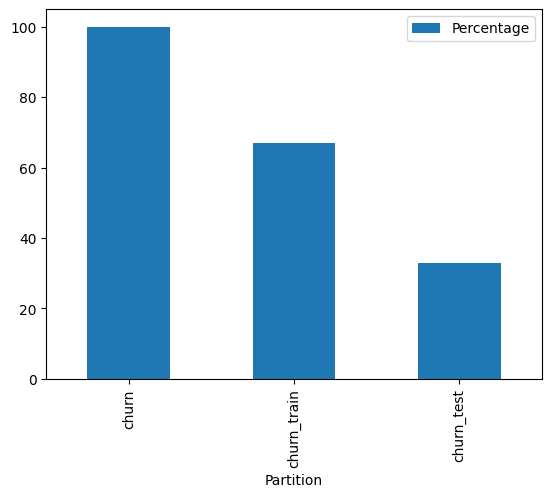

In [302]:
churn_train, churn_test = train_test_split(churn, test_size = 0.33)

print("Churn: ", churn.shape[0])
print("Churn_train: ", churn_train.shape[0])
print("Churn_test: ", churn_test.shape[0])

ch_bar = pd.DataFrame({'Partition': ['churn', 'churn_train', 'churn_test'],
                   'Percentage':[(churn.shape[0]/churn.shape[0])*100,
                              (churn_train.shape[0]/churn.shape[0])*100,
                              (churn_test.shape[0]/churn.shape[0])*100]
                   })
ch_bar.set_index('Partition').plot(kind='bar')

**2. Identify the total number of records in the training data set and how many records in the training data set have a churn value of true.**

In [303]:
churn_train['churn_numeric'] = churn_train['Churn'].apply(lambda x: 1 if x == True else 0)
true_churn_train = churn_train['churn_numeric'].sum()

print("Total of Train Records: ", churn_train.shape[0])
print("True Count:", true_churn_train)

Total of Train Records:  2233
True Count: 325


**3. Calculate how many true churn records you need to resample in order to have 20% of the rebalanced data set have true churn values.**

In [312]:
churn_train['Churn'].value_counts()

records_to_resample = churn_train.loc[churn_train['Churn'] == True]

records_to_resample.shape[0]

x=(0.2*2233-325)/(1-0.2)
print("Resample Count:", round(x))

Resample Count: 152


**4. Perform the rebalancing and confirm that 20% of the records in the rebalanced data set have true churn values.**

Rebalanced True Churn Values: 477
Rebalanced False Churn Values: 1908
Percentage Rebalanced 20.0


<Axes: xlabel='Churn Values'>

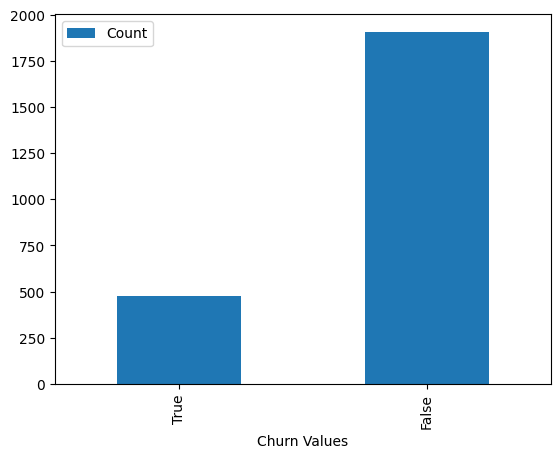

In [313]:
rebal_resample = records_to_resample.sample(n = 152, replace = True)

churn_train_rebal = pd.concat([churn_train, rebal_resample])

churn_train_rebal['Churn'].value_counts()

yes=churn_train_rebal.loc[churn_train_rebal['Churn']==True].shape[0]
round((yes/churn_train_rebal.shape[0])*100)
print("Rebalanced True Churn Values:", churn_train_rebal.loc[churn_train_rebal['Churn']==True].shape[0])
print("Rebalanced False Churn Values:", churn_train_rebal.loc[churn_train_rebal['Churn']==False].shape[0])
print("Percentage Rebalanced", 100 * (churn_train_rebal.loc[churn_train_rebal['Churn']==True].shape[0] / (churn_train_rebal.loc[churn_train_rebal['Churn']==True].shape[0] + churn_train_rebal.loc[churn_train_rebal['Churn']==False].shape[0])))

ch_true = pd.DataFrame({'Churn Values': [True, False],
                   'Count':[churn_train_rebal.loc[churn_train_rebal['Churn']==True].shape[0],
                              churn_train_rebal.loc[churn_train_rebal['Churn']==False].shape[0]]
                   })
ch_true.set_index('Churn Values').plot(kind='bar')

**5. Create a CART model using the training data set (Target: Churn; Predictors: Intl Charge, Day Charge, Night Charge). Visualize the decision tree. (Max leaf nodes: 5)**

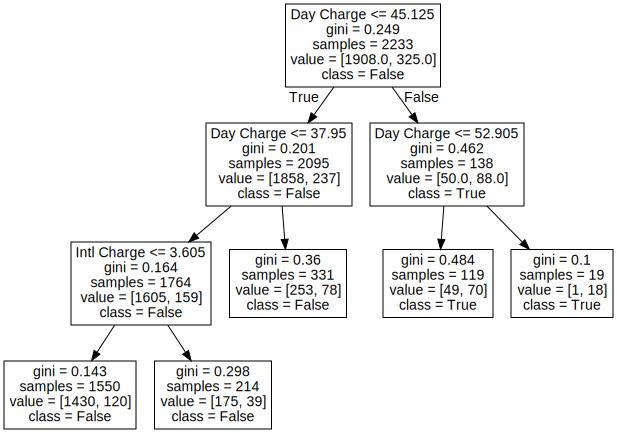

In [314]:
X = churn_train[['Intl Charge', 'Day Charge', 'Night Charge']]
y = churn_train["Churn"]

X_names = ['Intl Charge', 'Day Charge', 'Night Charge']
y_names = ['False', 'True']

churn_cart_model = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5).fit(X,y)

data = export_graphviz(churn_cart_model, out_file=None, feature_names=X_names, class_names=y_names)
graphviz.Source(data)

**6. Build a C5.0 model using the training data set (Target: Churn; Predictors: Intl Charge, Day Charge, Night Charge). Visualize the decision tree. (Max leaf nodes: 5)**

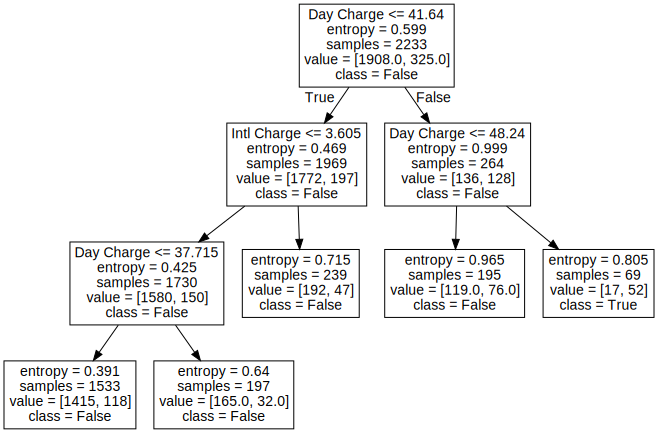

In [315]:
X = churn_train[['Intl Charge', 'Day Charge', 'Night Charge']]
y = churn_train["Churn"]

X_names = ['Intl Charge', 'Day Charge', 'Night Charge']
y_names = ['False', 'True']

churn_c50 = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=5).fit(X,y)

data = export_graphviz(churn_c50, out_file=None, feature_names=X_names, class_names=y_names)
graphviz.Source(data)

**7. Using the training data set, create a C5.0 model (Model_01) to predict a customer's Churn using Intl Charge, Day Charge, and Night Charge. Obtain the predicted churns.**

In [316]:
y = churn_train[['Churn']]
X = churn_train[['Intl Charge', 'Day Charge', 'Night Charge']]

churn_c50_1 = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5).fit(X,y)
churn_c50_01_pred = churn_c50_1.predict(churn_test[['Intl Charge', 'Day Charge', 'Night Charge']])

**8. Evaluate Model_01 using the test data set. Construct a contingency table to compare the actual and predicted values of Churn.**

In [317]:
churn_c50_1_con_table = pd.crosstab(churn_test['Churn'], churn_c50_01_pred, margins=True, margins_name='Total')
churn_c50_1_con_table

col_0,False,True,Total
Churn,,,
False,935,7,942
True,143,15,158
Total,1078,22,1100


**9. For Model_01, calculate all of the model evaluation measures. Call this table as "Model Evaluation Table".**

In [318]:
def model_eval(matrix,model_name):
    tn = matrix.iloc[0,0]
    tp = matrix.iloc[1,1]
    fn = matrix.iloc[1,0]
    fp = matrix.iloc[0,1]

    tap = fn+tp
    tan = tn+fp
    tpn = tn+fn
    tpp = fp+tp
    precision = tp/tpp
    recall = tp/tap
    total = tn+tp+fn+fp

    data = [
	            round((tp+tn)/total ,4),
	            round(1-((tp+tn)/total) ,4),
	            round(tp/tap ,4),
	            round(tn/tan ,4),
	            round(precision ,4),
              round(recall ,4),
	            round(2 * (precision * recall) / (precision + recall) ,4),
	            round(5 * (precision * recall) / ((4 * precision) + recall) ,4),
	            round(1.25 * (precision * recall) / ((.25 * precision) + recall) ,4)
	            ]
    return(
	            pd.DataFrame(data, columns=[model_name],
	                         index=['Accuracy', 'Error Rate', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1', 'F2', 'F0.5'])
	            )

churn_eval_table = model_eval(churn_c50_1_con_table, model_name = 'Model Evaluation Table')
churn_eval_table



,Model Evaluation Table
Accuracy,0.8636
Error Rate,0.1364
Sensitivity,0.0949
Specificity,0.9926
Precision,0.6818
Recall,0.0949
F1,0.1667
F2,0.1147
F0.5,0.3049


### END ###

In [311]:
# Using datetime
from datetime import datetime
import pytz
tz = pytz.timezone('Asia/Manila')
manila_now = datetime.now(tz)
# Print timestamp
print("Timestamp:", manila_now)

Timestamp: 2024-10-06 12:41:16.569121+08:00
